In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# DATA

In [2]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv').drop(['id','Unnamed: 32'],axis = 1)
print('Data Shape',df.shape)
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

Data Shape (569, 31)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29()

Attribute Information:

* 1) Diagnosis (1 = malignant, 0 = benign)

Ten real-valued features are computed for each cell nucleus:**(2-31)**


* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 2 is Mean Radius, field
12 is Radius SE, field 22 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Tumors can be benign (noncancerous) or malignant (cancerous). 
Benign tumors tend to grow slowly and do not spread. 
Malignant tumors can grow rapidly, invade and destroy nearby normal tissues, and spread throughout the body.

In [5]:
#Change Diagnosis to be last column
df['target'] = df['diagnosis'].copy()
df.drop(['diagnosis'],axis = 1,inplace = True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [6]:
corr = df.corr()

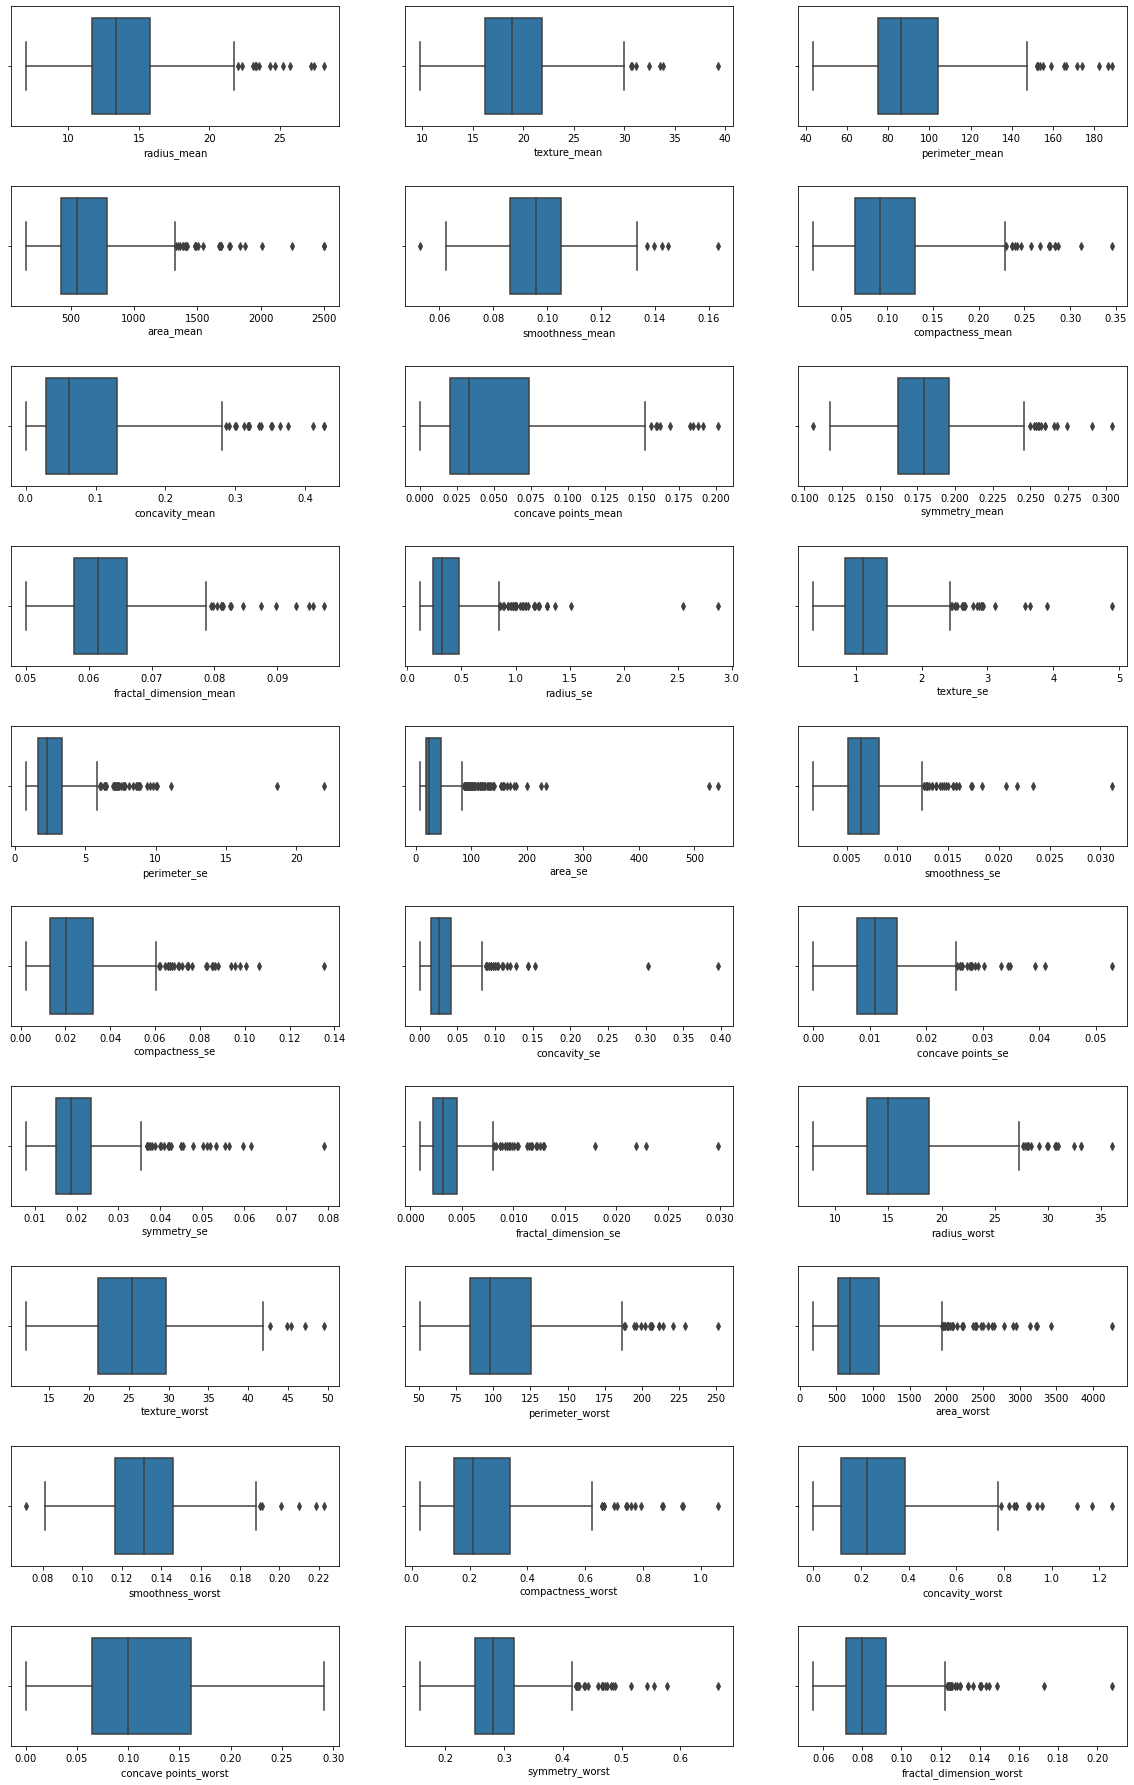

In [7]:
plt.figure(figsize =(20,32))
n = 0
for i in list(df.iloc[:,:-1].columns):
        n += 1
        plt.subplot(10,3,n)
        plt.subplots_adjust(hspace = 0.5,wspace = 0.2)
        sns.boxplot(x=df[i])
plt.show()

# Exploratory Data Analysis

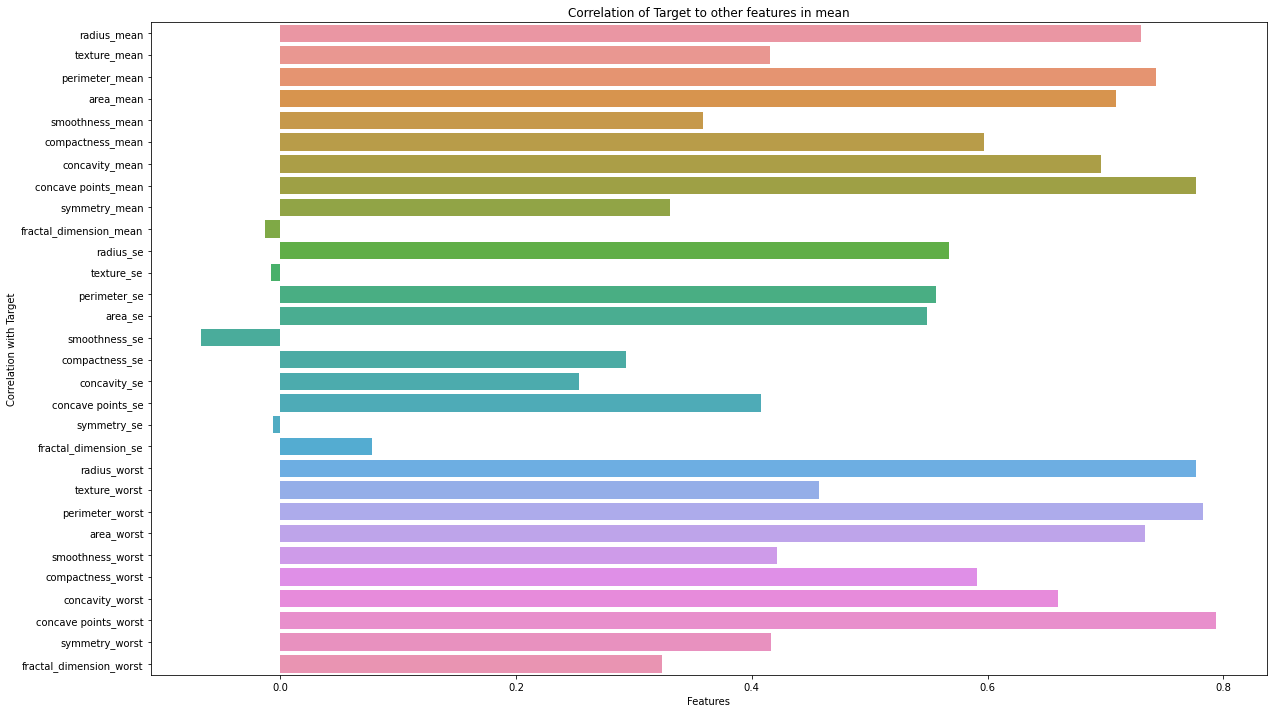

In [8]:
corr_target = (df[df.columns[0:]].corr()['target'][:-1]).to_frame()
plt.figure(1,figsize =(20,12))
sns.barplot(y = corr_target.index,x = corr_target['target'],data = corr_target, orient = "h")
plt.title('Correlation of Target to other features in mean')
plt.ylabel('Correlation with Target')
plt.xlabel('Features')
plt.show()

 ### A suitable threshold will be 0.7

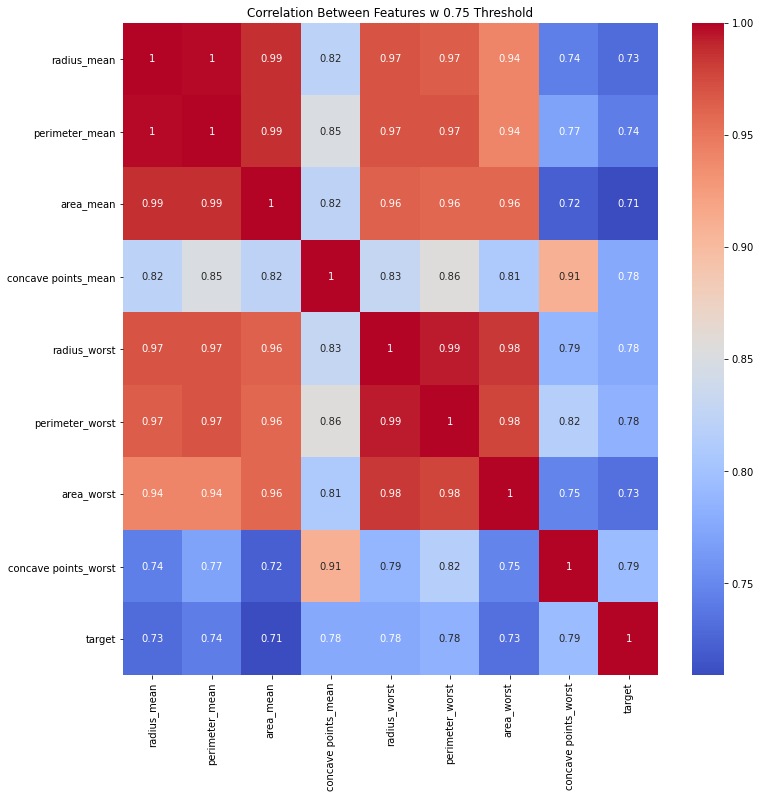

In [9]:
plt.figure(figsize = (12,12))
thresh = 0.7
mask = np.abs(corr["target"]) > thresh
heavy_features = corr.columns[mask].tolist()
sns.heatmap(df[heavy_features].corr(),annot=True,cmap = 'coolwarm');
plt.title("Correlation Between Features w 0.75 Threshold");
plt.show();

In [10]:
print('Features that heavily influence target are: ', heavy_features)

Features that heavily influence target are:  ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'target']


### **Principal Component Analysis can be performed on the above data, since the points ares heavily correlated.**

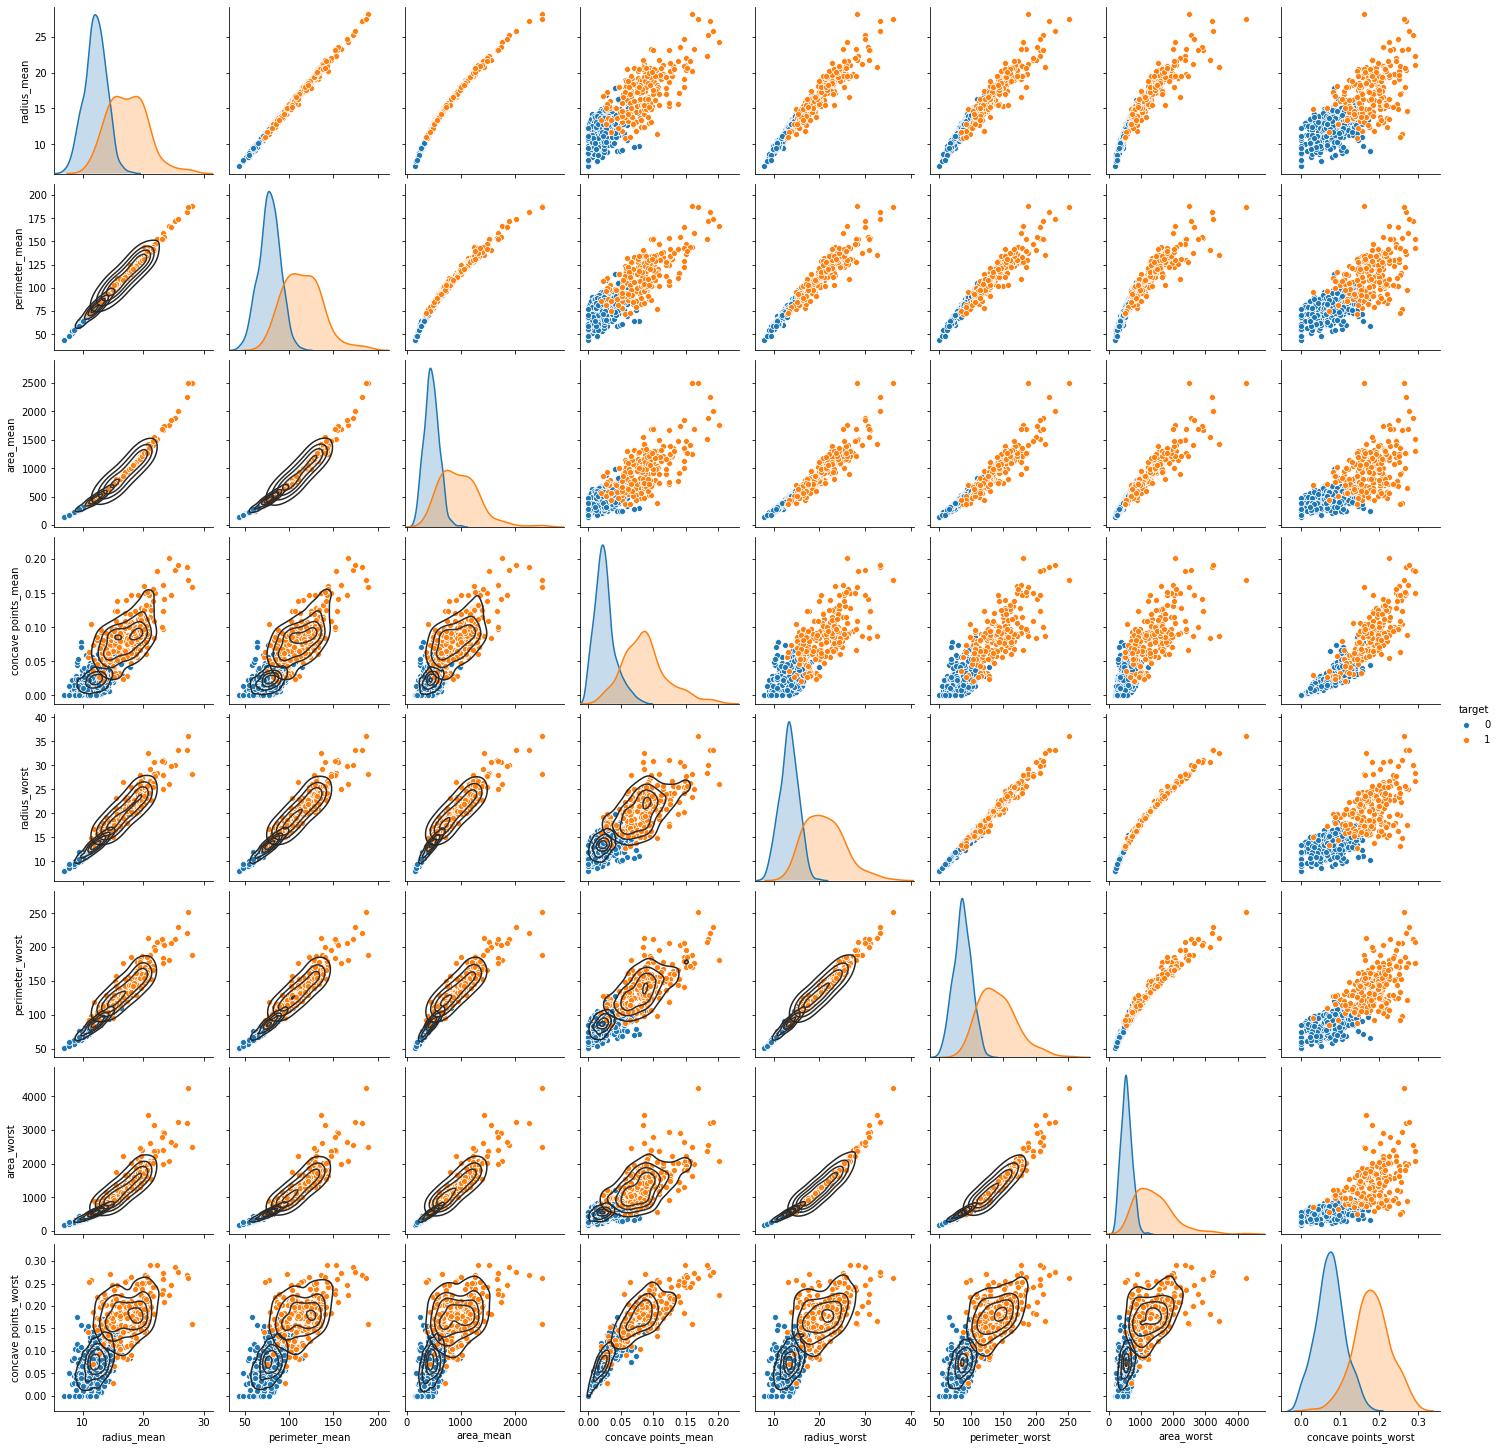

In [11]:
g = sns.pairplot(df.loc[:,heavy_features],hue = 'target',diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

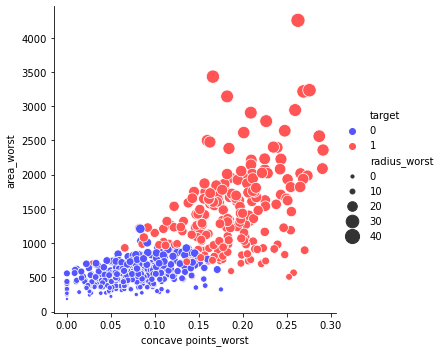

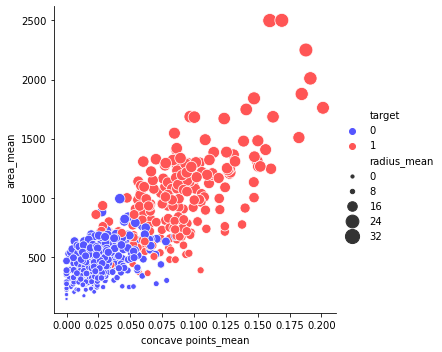

In [12]:
sns.relplot(data=df.loc[:,heavy_features],x="concave points_worst", y="area_worst",
    hue="target", size="radius_worst",
    palette='seismic', sizes=(10,200))
sns.relplot(data=df.loc[:,heavy_features],x="concave points_mean", y="area_mean",
    hue="target", size="radius_mean",
    palette='seismic', sizes=(10,200))
plt.show()

## PCA

In [13]:
cols = list(df.iloc[:,:-1].columns)
target = ['target']

In [14]:
# Scaling the features since, PCA is sensitive to scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Separating out the features
X = df.loc[:, cols].values
# Separating out the target
y = df.loc[:,target].values
# Standardizing the features
X = scaler.fit_transform(X)

# Pricipal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
principalComponents = pca.fit_transform(X)
pc_df = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6'])
pc_df = pd.concat([pc_df, df[target]], axis = 1)

# Model Building

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV

In [16]:
def grid_search(est,param_grid):
    fin_model = GridSearchCV(estimator=est,param_grid=param_grid,cv = 10,n_jobs = -1)
    return fin_model

In [17]:
def neigh(X_train,y_train,X_test,y_test):
    pipe = Pipeline([('neigh', KNeighborsClassifier())])
    param_grid = {'neigh__n_neighbors':[i for i in range(0,36)],
                 'neigh__weights':['uniform', 'distance']}
    pipe = grid_search(pipe,param_grid)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print('KNN_CLASSIFIER: ')
    print(classification_report(y_test, y_pred,zero_division = 1))
    print('PIPE SCORE: ', pipe.score(X_test, y_test))
    print('ACCURACY SCORE: ',accuracy_score(y_test, y_pred))
    print(pipe.best_params_)

In [18]:
def forest(X_train,y_train,X_test,y_test):
    #Parameter Grid
    pipe = Pipeline([('forest', RandomForestClassifier(random_state = 0))])
    param_grid = {'forest__n_estimators':[10,20,50,100,150,200],
                 'forest__max_depth' : [1,2,3,4,5,6],
                 'forest__max_features':['sqrt', 'log2']}
    pipe = grid_search(pipe,param_grid)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    #Evaluation Phase
    print('RANDOM FOREST: ')
    print(classification_report(y_test, y_pred,zero_division = 1))
    print('PIPE SCORE: ', pipe.score(X_test, y_test))
    print('ACCURACY SCORE: ',accuracy_score(y_test, y_pred))
    print(pipe.best_params_)

In [19]:
def svm(X_train,y_train,X_test,y_test):
    pipe = Pipeline([('svm', SVC(gamma = 'auto',random_state = 0))])
    param_grid = {'svm__kernel':['linear','poly', 'rbf'],
                 'svm__degree':[1,2,3,4,5],
                 'svm__C' : [1,2,3,4,5]}
    pipe = grid_search(pipe,param_grid)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print('SVM: ')
    print(classification_report(y_test, y_pred,zero_division = 1))
    print('PIPE SCORE: ', pipe.score(X_test, y_test))
    print('ACCURACY SCORE: ',accuracy_score(y_test, y_pred))
    print(pipe.best_params_)

In [20]:
X = pc_df.iloc[:,:-1]
y = pc_df.iloc[:,-1]
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state = 7)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 6) (114, 6) (455,) (114,)


In [21]:
neigh(X_train,y_train,X_test,y_test)

KNN_CLASSIFIER: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        74
           1       1.00      0.88      0.93        40

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

PIPE SCORE:  0.956140350877193
ACCURACY SCORE:  0.956140350877193
{'neigh__n_neighbors': 12, 'neigh__weights': 'distance'}


In [22]:
forest(X_train,y_train,X_test,y_test)

RANDOM FOREST: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        74
           1       0.90      0.88      0.89        40

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

PIPE SCORE:  0.9210526315789473
ACCURACY SCORE:  0.9210526315789473
{'forest__max_depth': 2, 'forest__max_features': 'sqrt', 'forest__n_estimators': 20}


In [23]:
svm(X_train,y_train,X_test,y_test)

SVM: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

PIPE SCORE:  0.9649122807017544
ACCURACY SCORE:  0.9649122807017544
{'svm__C': 3, 'svm__degree': 1, 'svm__kernel': 'poly'}


In [24]:
from xgboost import XGBClassifier
pipe = Pipeline([('xgb', XGBClassifier(random_state = 0))])
param_grid = {'xgb__learning_rate':[0.001,0.003,0.005,0.05],
                 'xgb__base_score': [1,0.5,0.3,0.1],
                 'xgb__importance_type': ['gain','entropy']}
pipe = grid_search(pipe,param_grid)
pipe.fit(X_train,y_train)
#make predictions for test data
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred,zero_division = 1))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(pipe.best_params_)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        74
           1       0.95      0.97      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 97.37%
{'xgb__base_score': 0.1, 'xgb__importance_type': 'gain', 'xgb__learning_rate': 0.05}
